In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM 
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('ASII_stock_combined.csv')
df['timestamp'] = pd.to_datetime(df['timestamp']) 
df = df.set_index('timestamp')
print(f"Jumlah Baris = {df.shape[0]}")
df.head()

Jumlah Baris = 1374


,open,low,high,close,volume
timestamp,,,,,
2019-01-01,8225,8225,8225,8225,0
2019-01-02,8200,8125,8275,8200,14014100
2019-01-03,8100,8100,8400,8375,25148400
2019-01-04,8400,8200,8450,8350,32475900
2019-01-07,8450,8150,8475,8150,32649700


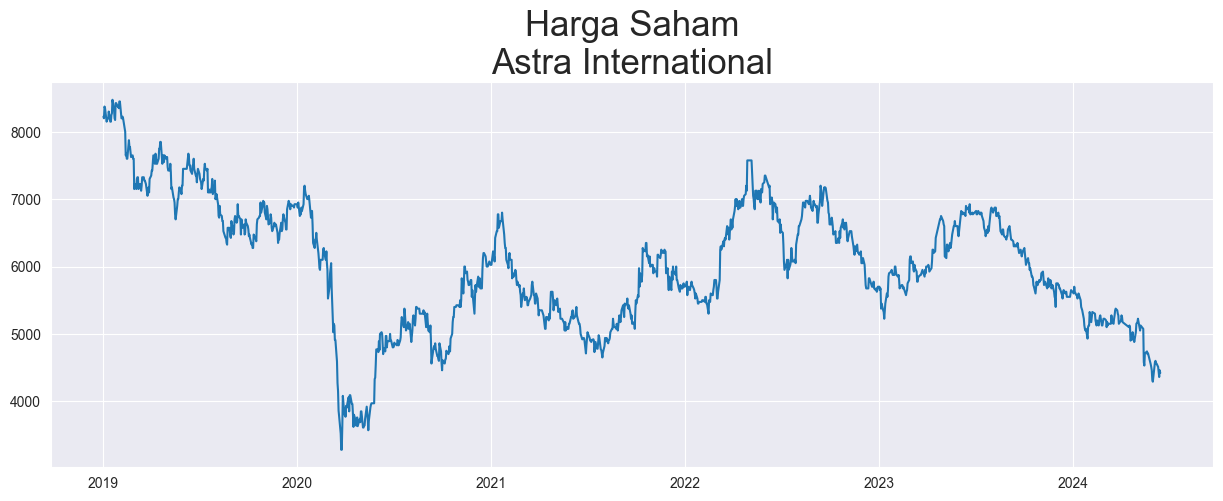

In [4]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df.index, df['close'])
plt.title("Harga Saham\nAstra International", fontsize=25)
plt.show()

In [5]:
ms = MinMaxScaler()
df['close'] = ms.fit_transform(df[['close']])

In [6]:
def split_data(df, train_size): 
    size = int(len(df) * train_size)
    train, test = df.iloc[0:size], df.iloc[size:len(df)]
    return train, test

In [7]:
train, test = split_data(df['close'], 0.8)

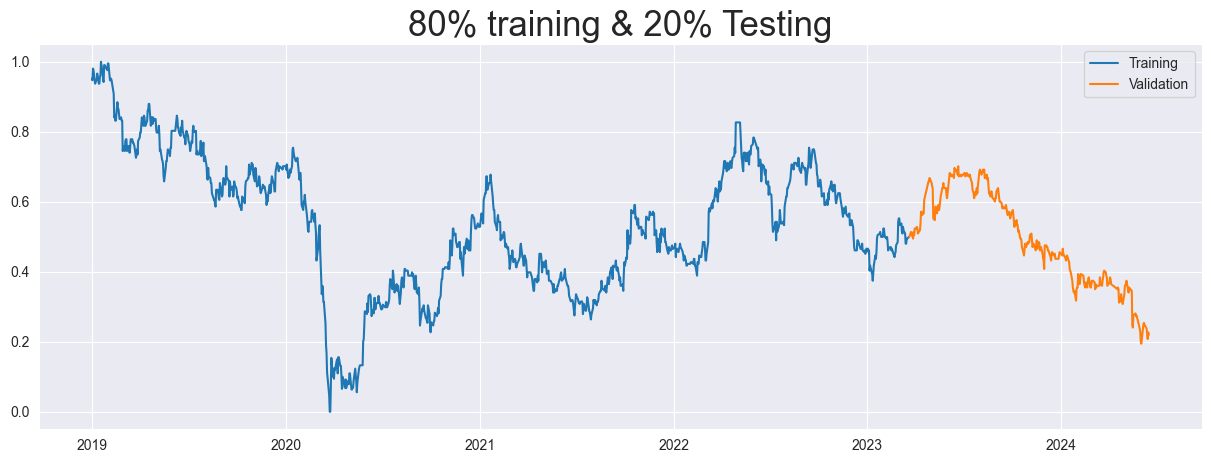

In [8]:
train, test = split_data(df['close'], 0.8) #80% Train
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(test)
plt.legend(labels=['Training', 'Validation'])
plt.title('80% training & 20% Testing', fontsize=25)
plt.show()

In [9]:
def split_target(df, look_back=1):
    X, y = [], []
    for i in range(len(df) - look_back):
        a = df[i:(i + look_back), 0]
        X.append(a)
        y.append(df[i + look_back, 0])
    return np.array(X), np.array(y)

In [10]:
X_train, y_train = split_target(train.values.reshape(len(train), 1))
X_test, y_test = split_target(test.values.reshape(len(test), 1))

In [11]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

In [12]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred_rf = model_rf.predict(X_test)

In [14]:
y_test_inv = ms.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv_rf = ms.inverse_transform(y_pred_rf.reshape(-1, 1))

In [15]:
mae_rf = mean_absolute_error(y_test_inv, y_pred_inv_rf)
mse_rf = mean_squared_error(y_test_inv, y_pred_inv_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_inv, y_pred_inv_rf)

In [16]:
print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R2 Score: {r2_rf}')

MAE: 80.60149450252078
MSE: 12274.837896804114
RMSE: 110.79186746690442
R2 Score: 0.9744083591125702


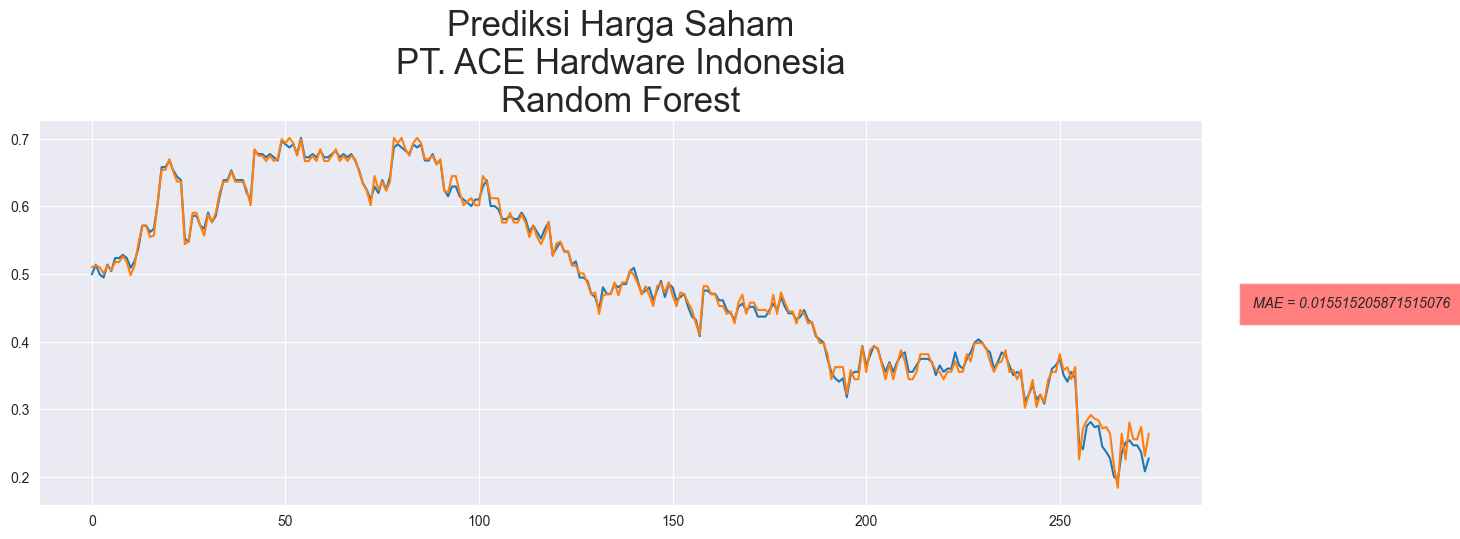

In [17]:
plt.figure(figsize=(15,5))
y_pred = model_rf.predict(X_test)
y_pred = list(np.reshape(y_pred, (1,len(y_pred)))[0])

X_test = np.reshape(X_test, (len(X_test),1))
X_test = list(np.reshape(X_test, (1,len(X_test)))[0])

plt.plot(X_test)
plt.plot(y_pred)
plt.text(300, 0.45, f"MAE = {mean_absolute_error(y_test, y_pred)}", style='italic', bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.title('Prediksi Harga Saham\nPT. ACE Hardware Indonesia\nRandom Forest', fontsize=25)
plt.show()